In [1]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math 
img = cv.imread('../images/gal_gadot.jpg',cv.IMREAD_GRAYSCALE)
fig, axes = plt.subplots(1,2,squeeze = False,figsize = (20,7), sharex = False)
axes[0,0].imshow(img,cmap='gray')
axes[0,1].hist(img.ravel(),256,[0,256],color ='black');
axes[0,1].set_xlabel("Intensity")
axes[0,1].set_ylabel("# of pixels")
plt.show()

ModuleNotFoundError: No module named 'cv2'

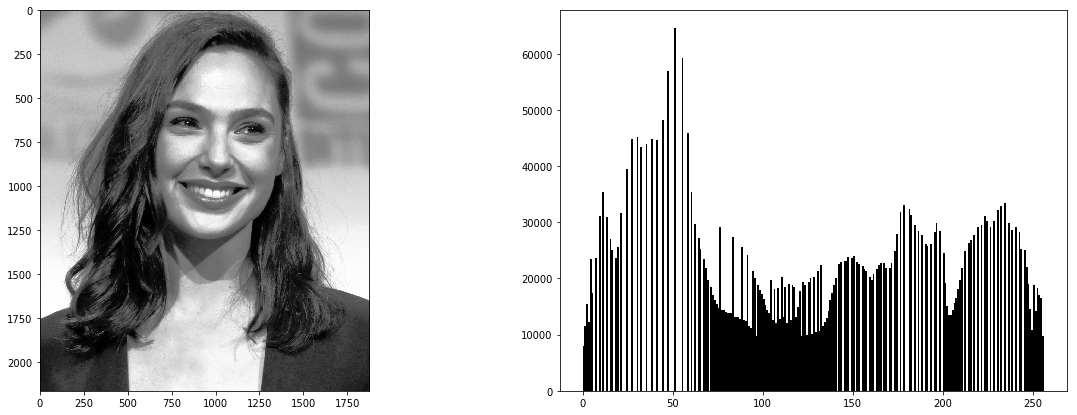

In [2]:
eq_img = cv.equalizeHist(img) 
fig_2, axes_2= plt.subplots(1,2,figsize=(20,7)) 
axes_2[0].imshow(eq_img,cmap='gray') 
axes_2[1].hist(eq_img.ravel(),256,[0,256],color='black') 
plt.show()

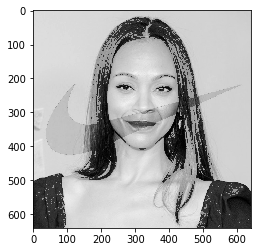

In [13]:
alpha =0.2
img_1 = cv.imread('../images/zoe.jpg',cv.IMREAD_GRAYSCALE)
img_2 = cv.imread('../images/nike.jpg',cv.IMREAD_GRAYSCALE)
#plt.imshow(img_2,'gray')
np.shape(img_1)[1]
np.shape(img_2)
for i in range(0,np.shape(img_2)[0]):
    for j in range(0,np.shape(img_2)[1]):
        val = (1-alpha)*img_2[i][j]+img_1[i][j]
        if (val >255):
            img_1[i][j] = (val/510)*255
plt.imshow(img_1,'gray')
plt.show()

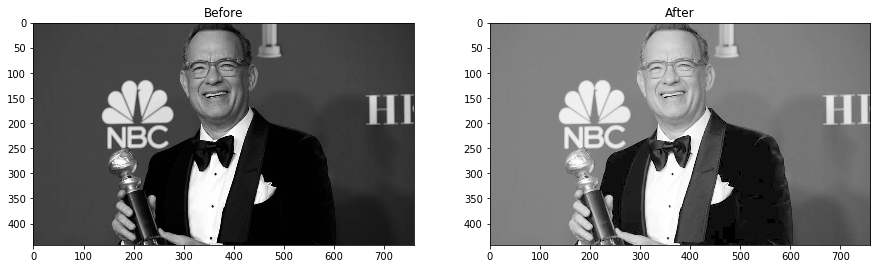

In [4]:
gamma = 0.5
tom = cv.imread('../images/tom_hanks.jpg',cv.IMREAD_GRAYSCALE)
LUT = np.empty((1,256), np.uint8)
for i in range(256):
    LUT[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
result = cv.LUT(tom, LUT)
fig, axes = plt.subplots(1,2,figsize=(15,5))
axes[0].imshow(tom,'gray')
axes[1].imshow(result,'gray')
axes[0].set_title("Before")
axes[1].set_title("After")
plt.show()

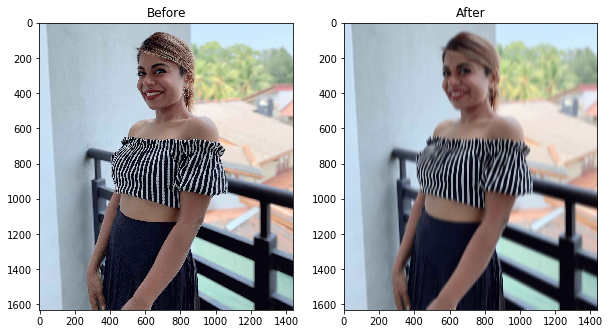

In [5]:
umaria = cv.imread('../images/umaria.jpg',cv.IMREAD_COLOR)
umaria = cv.cvtColor(umaria,cv.COLOR_BGR2RGB)
kernel = cv.getGaussianKernel(31,10)
result_gau_smth = cv.filter2D(umaria,-1,kernel)
fig, axes = plt.subplots(1,2,figsize=(10,20))
axes[0].imshow(umaria)
axes[1].imshow(result_gau_smth)
axes[0].set_title("Before")
axes[1].set_title("After")
plt.show()

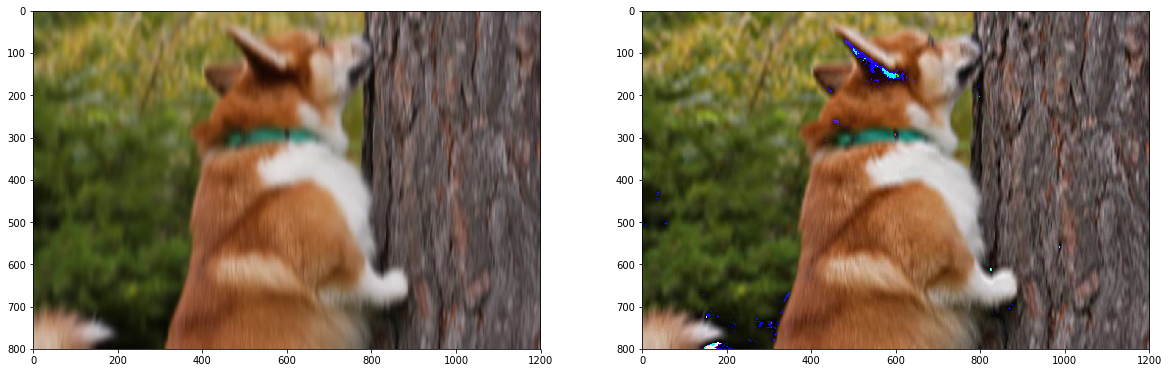

In [6]:
corgi = cv.imread('../images/corgi_blurred.jpg',cv.IMREAD_COLOR) #blurred image
corgi = cv.cvtColor(corgi,cv.COLOR_BGR2RGB)
#create a blurred image and then subtract it from the original
kernel_gaussian = cv.getGaussianKernel(31,10)
intermediate = corgi - cv.filter2D(corgi,-1,kernel_gaussian)
#add the intermediate to the original image with a coefficient
coefficient = 2
result = np.clip(corgi + coefficient * intermediate,0,255)
fig,axes = plt.subplots(1,2,figsize=(20,10))
axes[0].imshow(corgi)
axes[1].imshow(result)
plt.show()

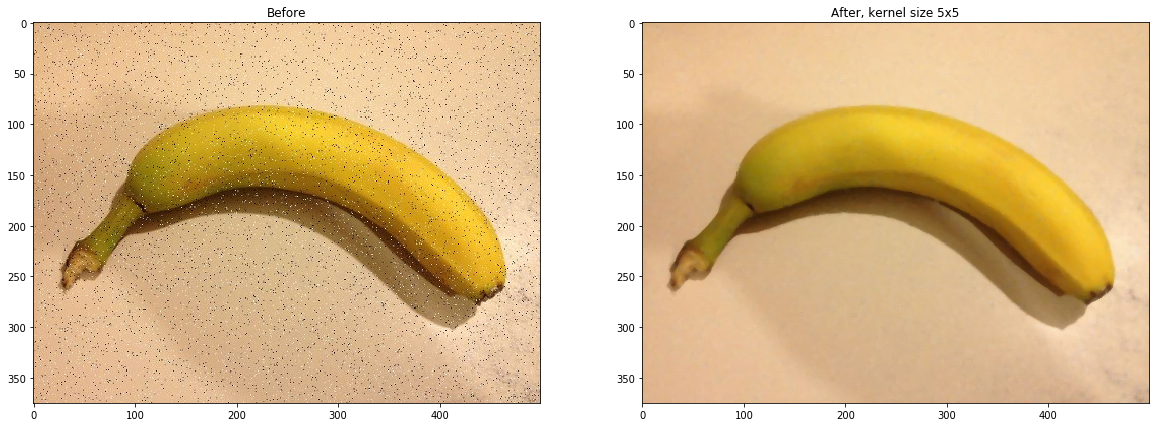

In [28]:
banana = cv.imread('../images/banana.jpg',cv.IMREAD_COLOR)
banana = cv.cvtColor(banana,cv.COLOR_BGR2RGB)
median_result = cv.medianBlur(banana,5)
fig, axes = plt.subplots(1,2,figsize=(20,20))
axes[0].imshow(banana)
axes[1].imshow(median_result)
axes[0].set_title("Before")
axes[1].set_title("After, kernel size 5x5")
plt.show()

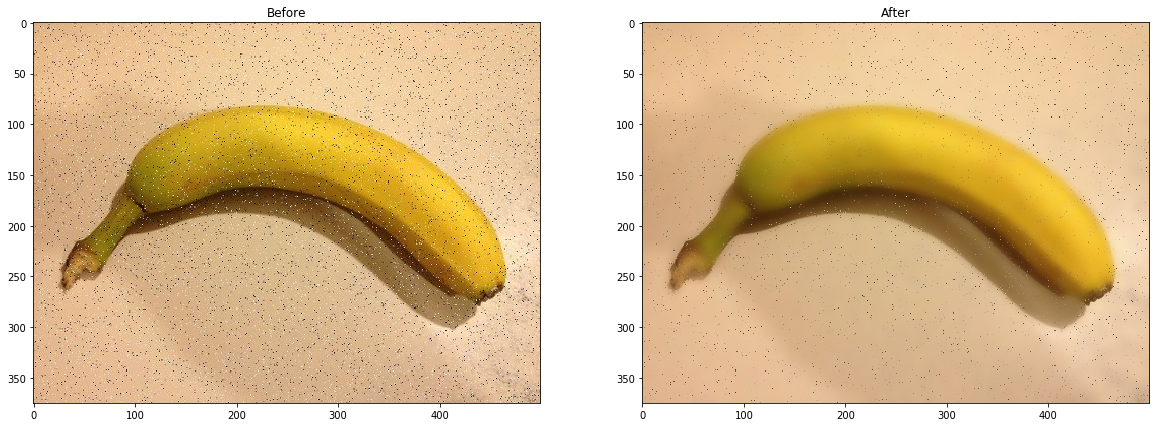

In [6]:
banana_2 = cv.imread('../images/banana.jpg',cv.IMREAD_COLOR)
banana_2 = cv.cvtColor(banana_2,cv.COLOR_BGR2RGB)
bilateral_result = cv.bilateralFilter(banana_2,15,150,80)
fig, axes = plt.subplots(1,2,figsize=(20,20))
axes[0].imshow(banana_2)
axes[1].imshow(bilateral_result)
axes[0].set_title("Before")
axes[1].set_title("After")
plt.show()

The bilateral filter generates the output value of the pixel using a weighted combination of the neighbouring pixels(pixels corresponding to the kernel). Unlike in gaussian or averaging filter bilateral filter takes into account the distance of the pixel from the centre, and the difference in the intensity of the pixel in consideration and the other. Both of these values are essentially then put to a gaussian equation (exp(val)) and then multiplied together. We get different values in the kernel for each pixel. This filter does a fairly good job at preserving edges while filtering noise.
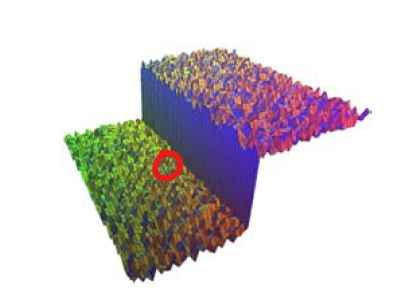
Consider a point in the red circled area close to the edge. The pixels which are at the left side of the edge are all at around the same low intensity. Similar scenario on the right as well. 
When the spatial weight is calculated, we get a kernel like a normal gaussian.
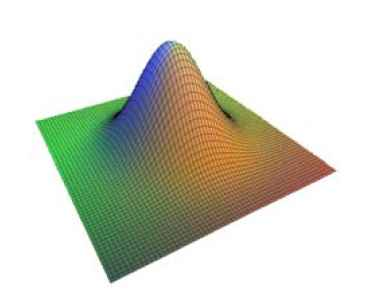
However, when the intensity based weights are calculated since the intensities differ by a large amount across the edge, we get a very low value. Since this is a gaussian calculation the pixels at the same side give a value close to 1.
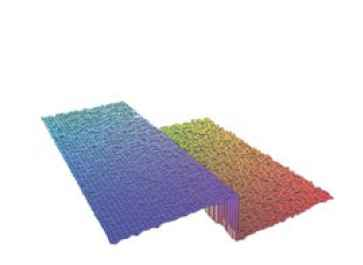
The final kernel to be convolved is depicted below.
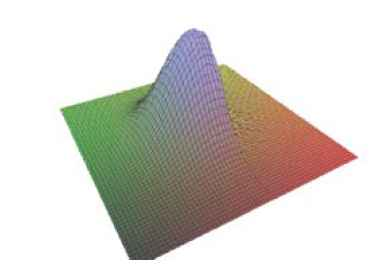 Similar to a one sided gaussian. Note that on the points which are far away from the edge, we get a normal gaussian kernel.
Finally we can smoothen out the noise while preserving the edge.
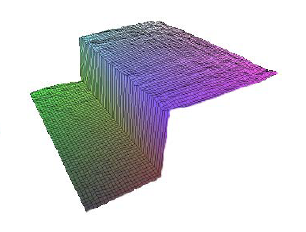

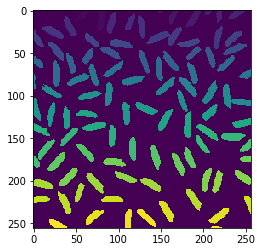

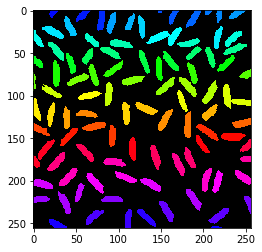

Number of grains:  100


In [46]:
im = cv.imread("../images/rice.png",cv.IMREAD_GRAYSCALE)
thresh = cv.adaptiveThreshold(im, 255.0, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 45, -30.0)
label_count, labeled_img = cv.connectedComponents(thresh)
def color_map(labels):
    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv.cvtColor(labeled_img, cv.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0

    plt.imshow(labeled_img)
    plt.show()

color_map(labeled_img)
print("Number of grains: ",label_count)

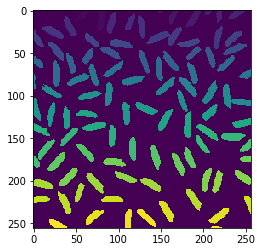

In [41]:
num_labels, labels_im = cv.connectedComponents(thresh)
plt.imshow(labels_im)
plt.show()

In [6]:
def roundC(n):
    if n - math.floor(n) < 0.5:
        return math.floor(n)
    return math.ceil(n)
def zoom_img(img, scale, method):
    rows = math.ceil(scale*img.shape[0])
    cols = math.ceil(scale*img.shape[1])
    zoomed = np.zeros((rows,cols,3),np.uint8)
    if method =='a':
        for i in range(int(rows)):
            for j in range(int(cols)):
                x = roundC(i/scale)
                y = roundC(j/scale)
                if x == int(rows/scale):
                    x = x -1
                if y == int(cols/scale):
                    y = y -1
                zoomed[i,j] = img[x][y]
        return zoomed
        #img_correct = cv.imread('../images/assign1/im02.png',cv.IMREAD_REDUCED_GRAYSCALE_2)
    if method == 'b':
        for i in range(rows):
            x1 = int(math.floor(i/scale))
            x2 = int(math.ceil(i/scale))
            if x1 ==0:
                x1 =1
            dx = (i%x1)/scale
            for j in range(cols):
                y1 = int(math.floor(j/scale))
                y2 = int(math.ceil(j/scale))
                if y1==0:
                    y1 =1
                dy = (j%y1)/scale

                Ia = img[x1-1,y1-1]
                Ib = img[x2-1,y1-1]
                Id = img[x1-1,y2-1]
                Ic = img[x2-1,y2-1]
                zoomed[i,j] = (1-dy)*(dx*Ia + (1-dx)*Ib) + dy*(dx*Ic + (1-dx)*Id)
            zoomed = np.array(zoomed, dtype = 'uint8') 
        return zoomed

In [10]:
from ipyparallel import Client
%pylab inline

Populating the interactive namespace from numpy and matplotlib


SSD for nearest neighbour = 2064023976
SSD per pixel, for nearest neighbour = 82
SSD for bilinear interpolation = 2093596439
SSD per pixel, for bilinear interpolation = 84


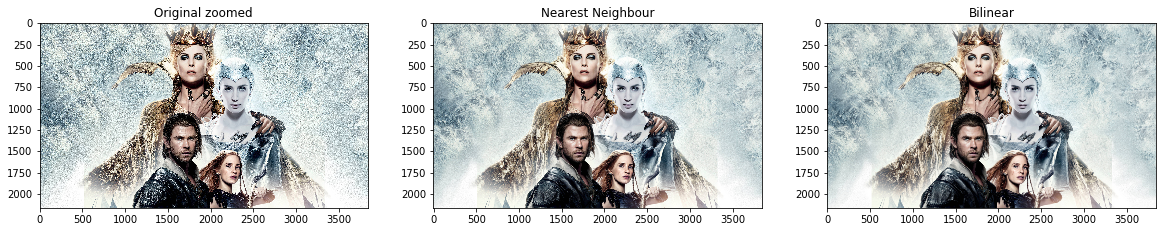

In [11]:
img = cv.imread('../images/assign1/im05small.png',cv.IMREAD_COLOR)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
bilinear = zoom_img(img,4,'b')
nearest_neighbour = zoom_img(img,4,'a')
img_zoomed = cv.imread('../images/assign1/im05.png',cv.IMREAD_COLOR)
img_zoomed = cv.cvtColor(img_zoomed,cv.COLOR_BGR2RGB)
SSD_nn = np.sum((img_zoomed - nearest_neighbour)**2)
SSD_bl = np.sum((img_zoomed - bilinear)**2)

SSD_nn_per_pixel = SSD_nn/img_zoomed.size
SSD_bl_per_pixel = SSD_bl/img_zoomed.size

print('SSD for nearest neighbour = %d' %SSD_nn)
print('SSD per pixel, for nearest neighbour = %d' %SSD_nn_per_pixel)
print('SSD for bilinear interpolation = %d' %SSD_bl)
print('SSD per pixel, for bilinear interpolation = %d' %SSD_bl_per_pixel)
fig, axes = plt.subplots(1,3,figsize=(20,20))
axes[0].imshow(img_zoomed)
axes[1].imshow(nearest_neighbour)
axes[2].imshow(bilinear)
axes[0].set_title("Original zoomed")
axes[1].set_title("Nearest Neighbour")
axes[2].set_title("Bilinear")
plt.show()

In [7]:
def multiply(array,n):

    # Here array is the input image

    # n is the scalar
    LUT = np.empty((1,256), np.uint8)
    for i in range(256):
        LUT[0,i] = i*n

    result = cv.LUT(array, LUT)

    return result

In [8]:
img_1 = cv.imread('../images/zoe.jpg',cv.IMREAD_GRAYSCALE)
multiply(img_1,3)

array([[ 10,  10,  10, ..., 188, 185, 185],
       [ 10,  10,  10, ..., 188, 185, 185],
       [ 10,  10,  10, ..., 188, 188, 185],
       ..., 
       [ 93,  96,  96, ...,  99, 102, 105],
       [ 96,  96,  96, ..., 105, 111, 117],
       [ 99,  99,  99, ..., 111, 123, 132]], dtype=uint8)

In [9]:
img_1

array([[174, 174, 174, ..., 148, 147, 147],
       [174, 174, 174, ..., 148, 147, 147],
       [174, 174, 174, ..., 148, 148, 147],
       ..., 
       [ 31,  32,  32, ...,  33,  34,  35],
       [ 32,  32,  32, ...,  35,  37,  39],
       [ 33,  33,  33, ...,  37,  41,  44]], dtype=uint8)

In [12]:
columns = 3 + 1
raws= 3
channels = 2
transform = np.arange(255,-1,-1).astype(np.uint8) # transformation with shape (256,)

img = np.array([[[i for i in range(columns)] for j in range(raws) ] for k in range(channels)]).astype(np.uint8) 

imgTrans = cv.LUT(img,transform)
print(imgTrans[1,0,3])

252


In [24]:
def thresh(array):

    # Here array is the input image

    # n is the scalar
    LUT = np.empty((1,256), np.uint8)
    for i in range(0,20):
        LUT[0,i] = 255
    for i in range(20,256):
        LUT[0,i] = 0

    result = cv.LUT(array, LUT)

    return result

In [25]:
img = np.array([[102,140,45,32,89,211,141],

              [150,120,45,32,89,21,31],

              [107,1,4,3,89,101,61],

              [100,2,10,13,89,101,91],

              [140,19,15,3,89,181,71],

              [102,150,45,32,89,1,4],

              [200,1256,45,32,89,2,9]],dtype = np.uint8)
img = thresh(img)

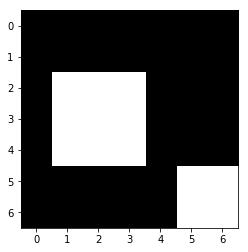

In [26]:
plt.imshow(img,cmap='gray')